# Acidentes e incidentes aeronáuticos do Brasil de 2008 a 2018
Análise de dados sobre acidentes e incidentes aeronáuticos ocorridos no brasil nos últimos 10 anos.

# Preparando o ambiente e Importanto dados 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

from seaborn import countplot
from matplotlib.pyplot import figure, show
from collections import Counter

In [2]:
acidentes = pd.read_csv('accidents.csv')

# Visualisando os dados importados

In [3]:
acidentes.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


# Removendo Colunas não usadas

In [4]:
lista = []
for i in range(1, 88):
    lista.append('fator_'+ str(i))
lista
acidentes.drop(columns=lista, inplace=True)

# Listando as Colunas do arquivo

In [5]:
acidentes.columns

Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_tipo',
       'ocorrencia_dia', 'ocorrencia_horario', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'aeronave_matricula', 'aeronave_equipamento', 'aeronave_fabricante',
       'aeronave_modelo', 'aeronave_tipo_motor', 'aeronave_quantidade_motores',
       'aeronave_peso_maximo_decolagem', 'aeronave_quantidade_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_registro',
       'aeronave_categoria_registro', 'aeronave_segmento_aviacao',
       'aeronave_origem_voo', 'aeronave_destino_voo', 'aeronave_fase_voo',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'quantidade_fatalidades', 'quantidade_fatores_contribuintes',
       'dia_extracao'],
      dtype='object')

# Tipos de classificações de ocorrencias existentes na base de dados

In [6]:
plt.style.use("ggplot")
print(acidentes['ocorrencia_classificacao'].unique())

['ACIDENTE' 'INCIDENTE' 'INCIDENTE GRAVE']


# Número de ocorrencias, por classificação. 
Dessa forma podemos observar que incidentes, menos grave, são os tipos de ocorrência mais comum.

In [7]:
print(acidentes['ocorrencia_classificacao'].value_counts())

INCIDENTE          2817
ACIDENTE           1677
INCIDENTE GRAVE     622
Name: ocorrencia_classificacao, dtype: int64


# Visualizando melhor em um gráfico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x106EF270>],
      dtype=object)

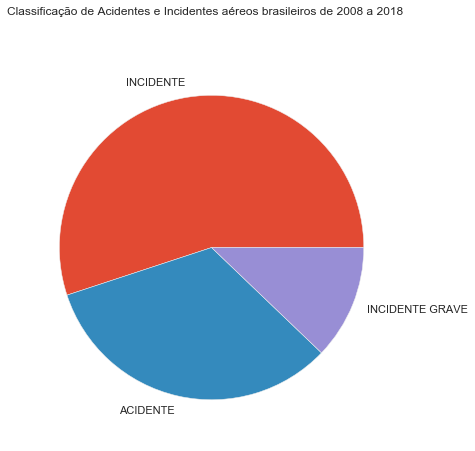

In [93]:
acidentes['ocorrencia_classificacao'].value_counts().plot(kind='pie', subplots=True, label="", title="Classificação de Acidentes e Incidentes aéreos brasileiros de 2008 a 2018" ,figsize=(7, 7))

# Tipos de Ocorrência existentes na base de dados

In [9]:
print(acidentes['ocorrencia_tipo'].unique())

['FALHA DO MOTOR EM VOO' 'AERÓDROMO' 'POUSO SEM TREM'
 'COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO' 'OUTROS'
 'PERDA DE CONTROLE NO SOLO' 'TRÁFEGO AÉREO' 'POUSO LONGO'
 'PERDA DE CONTROLE EM VOO' 'INDETERMINADO' 'COM TREM DE POUSO'
 'ESTOURO DE PNEU' 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO'
 'EXCURSÃO DE PISTA' 'POUSO BRUSCO' 'COM ROTOR' 'INCURSÃO EM PISTA'
 'VOO CONTROLADO CONTRA O TERRENO' 'VAZAMENTO DE OUTROS FLUIDOS'
 'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE ' 'SOPRO DE REATOR'
 'COM PARA-BRISAS / JANELA / PORTA' 'PERDA DE COMPONENTE EM VOO'
 'COLISÃO COM OBSTÁCULOS NO SOLO' 'COM COMANDOS DE VOO'
 'DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA' 'POUSO ANTES DA PISTA'
 'FUMAÇA NA CABINE' 'COM PESSOAL EM VOO' 'PERDA DE COMPONENTE NO SOLO'
 'COLISÃO DE VEÍCULO COM AERONAVE' 'FOGO EM VOO' 'COM LANÇAMENTO DE CARGA'
 'COLISÃO DE AERONAVES EM VOO' 'FALHA DO MOTOR NO SOLO' 'FOGO NO SOLO'
 'F.O.D.' 'SOPRO DE ROTOR' 'CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO'
 'SUPERAQUECIM

# Número de ocorrências 

In [10]:
print(acidentes['ocorrencia_tipo'].value_counts())

FALHA DO MOTOR EM VOO                                  668
ESTOURO DE PNEU                                        589
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE     554
PERDA DE CONTROLE NO SOLO                              488
OUTROS                                                 351
PERDA DE CONTROLE EM VOO                               342
COM TREM DE POUSO                                      308
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO      188
TRÁFEGO AÉREO                                          155
COLISÃO COM OBSTÁCULOS NO SOLO                         113
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO              105
PANE SECA                                               99
POUSO EM LOCAL NÃO PREVISTO                             98
POUSO SEM TREM                                          89
POUSO BRUSCO                                            83
INDETERMINADO                                           72
COM PARA-BRISAS / JANELA / PORTA                        

# Visualizando melhor em um gráfico os tipos de ocorrência

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

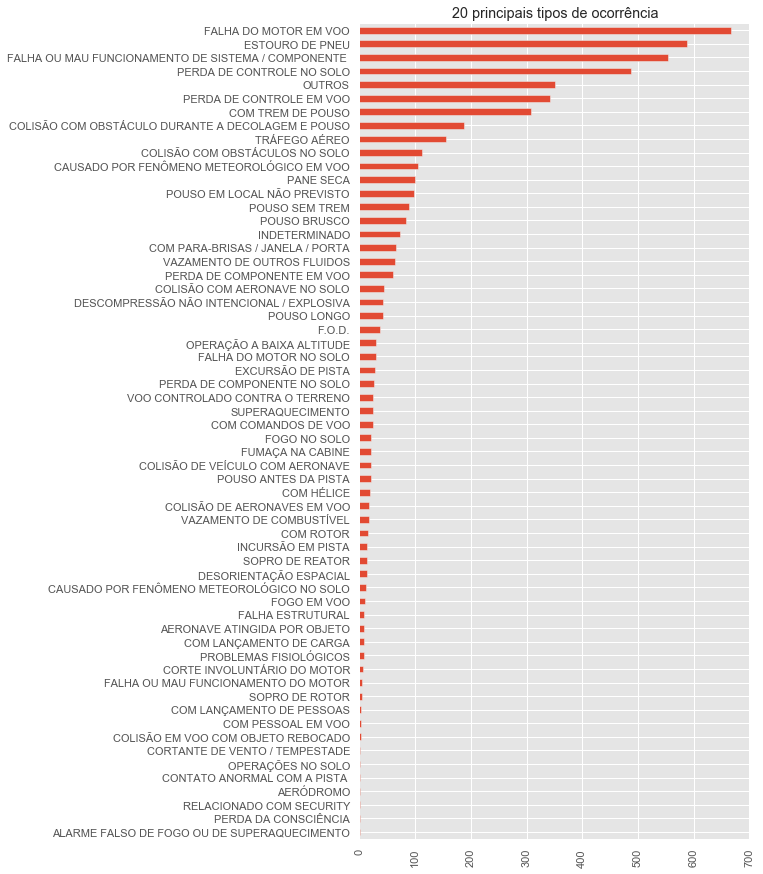

In [92]:
plt.style.use("ggplot")
a = acidentes['ocorrencia_tipo'].value_counts().sort_values(ascending=[True])
a.plot(kind='barh', subplots=True, label="20 principais tipos de ocorrência" ,figsize=(7, 15))
plt.xticks(rotation=90)

# Quantidade e ocorrências por estado

In [12]:
por_estado = acidentes.groupby('ocorrencia_uf')['codigo_ocorrencia'].count().sort_values(ascending=[False])
print(por_estado)

ocorrencia_uf
SP     1191
RJ      496
MG      458
PR      428
RS      344
GO      263
PA      244
MT      238
AM      216
BA      206
SC      160
DF      154
MS      129
PE       87
CE       71
ES       66
MA       59
AC       52
TO       51
RR       51
PI       38
RO       28
PB       20
SE       19
AL       16
RN       15
AP       13
***       3
Name: codigo_ocorrencia, dtype: int64


# Plotando a quantidade de ocorrências por estado em gráfico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00D405D0>],
      dtype=object)

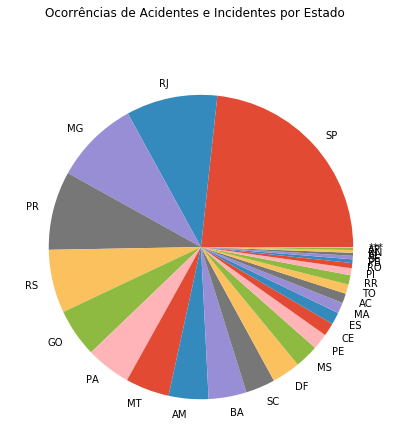

In [13]:
plt.style.use("ggplot")
por_estado.plot(kind='pie', subplots=True, label="", title="Ocorrências de Acidentes e Incidentes por Estado" ,figsize=(7, 7))

# Quantidade de ocorrências por tipo de motor

In [14]:
tipo_motor = acidentes['aeronave_tipo_motor'].value_counts()
tipo_motor

PISTÃO        2960
JATO          1011
TURBOÉLICE     613
TURBOEIXO      464
***             51
SEM TRAÇÃO      17
Name: aeronave_tipo_motor, dtype: int64

# Plotando essa informação em um gráfico

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

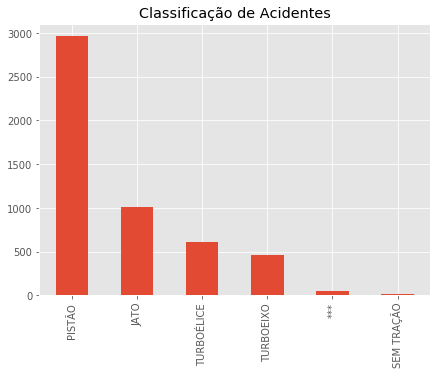

In [15]:
plt.style.use("ggplot")
tipo_motor.plot(kind='bar', subplots=True, label="Classificação de Acidentes" ,figsize=(7, 5))
plt.xticks(rotation=90)

# Casos mais graves de ocorrência, separados por tipo de motor.
Mais uma vez, motor a pistão mostra-se mais inseguro que os demais. Entretando, o motor a jato cai para última colocação.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

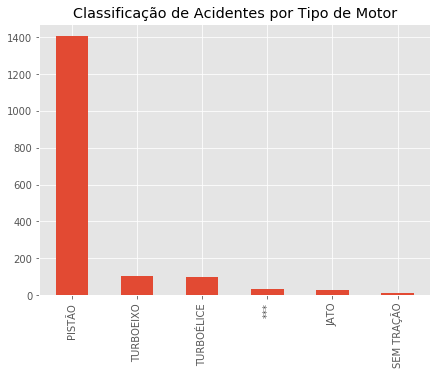

In [18]:
plt.style.use("ggplot")
w = acidentes[ acidentes['ocorrencia_classificacao'] == 'ACIDENTE']
w['aeronave_tipo_motor'].value_counts()
w['aeronave_tipo_motor'].value_counts().plot(kind='bar', subplots=True, label="Classificação de Acidentes por Tipo de Motor" ,figsize=(7, 5))
plt.xticks(rotation=90)

# Ocorrência por tipo de Aeronave

In [18]:
print(acidentes['aeronave_equipamento'].value_counts())

AVIÃO          4220
HELICÓPTERO     585
ULTRALEVE       261
PLANADOR         17
***              15
ANFÍBIO          12
DIRIGÍVEL         2
TRIKE             2
BALÃO             1
HIDROAVIÃO        1
Name: aeronave_equipamento, dtype: int64


# Plotando ocorrência por tipo de Aeronave em gráfico

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1027F730>],
      dtype=object)

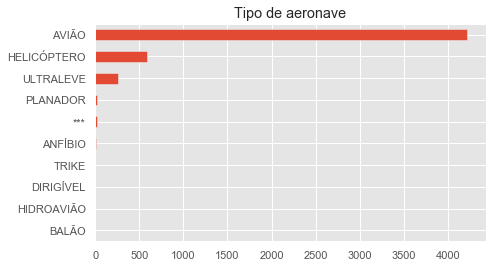

In [94]:
plt.style.use("ggplot")
acidentes['aeronave_equipamento'].value_counts().sort_values(ascending=[True]).plot(kind='barh', subplots=True, label="Tipo de aeronave" ,figsize=(7, 4))

# Gráfico de ocorrências por ano

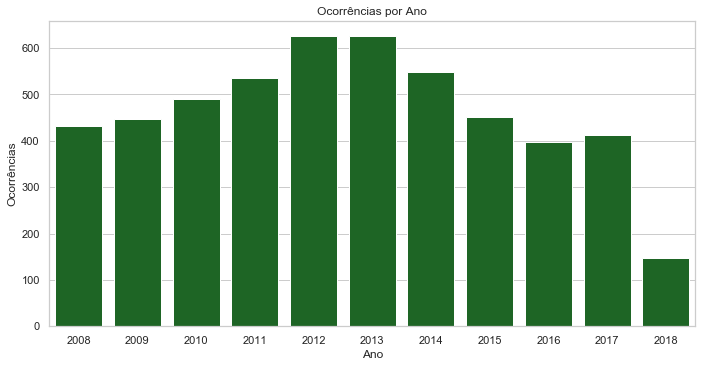

In [90]:
acidentes['ocorrencia_dia'] = pd.to_datetime(acidentes['ocorrencia_dia'])
acidentes['Dia'] = acidentes['ocorrencia_dia'].map(lambda x: x.day)
acidentes['Ano'] = acidentes['ocorrencia_dia'].map(lambda x: x.year)
acidentes['Mes'] = acidentes['ocorrencia_dia'].map(lambda x: x.month)

ocorrencias_por_ano = Counter(acidentes['Ano'])
anos = list(ocorrencias_por_ano.keys())
acidentes_ano = list(ocorrencias_por_ano.values())

fig = plt.figure(figsize=(10, 10))

sub1= fig.add_subplot(211)
sns.barplot(x=anos, y=acidentes_ano, color='g', ax=sub1)
sub1.set(ylabel="Ocorrências", xlabel="Ano", title="Ocorrências por Ano")
plt.tight_layout(w_pad=4, h_pad=3)

# Gráfico de ocorrências por mês

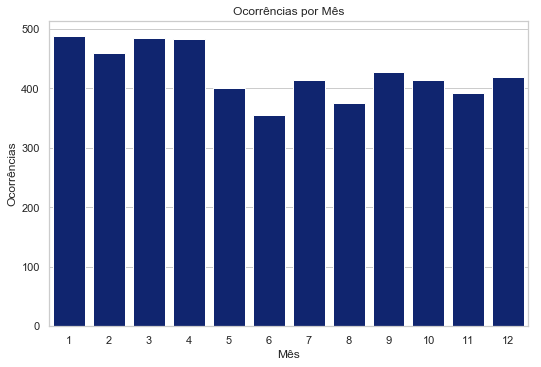

In [89]:
ocorrencias_por_mes = Counter(acidentes['Mes'])
meses = list(ocorrencias_por_mes.keys())
acidentes_mes = list(ocorrencias_por_mes.values())

fig = plt.figure(figsize=(15, 10))
sub2 = fig.add_subplot(223)
sns.barplot(x=meses, y=acidentes_mes, color='b', ax=sub2)
sub2.set(ylabel="Ocorrências", xlabel="Mês", title="Ocorrências por Mês")
plt.tight_layout(w_pad=4, h_pad=3)

# Gráfico de ocorrências por estação do ano

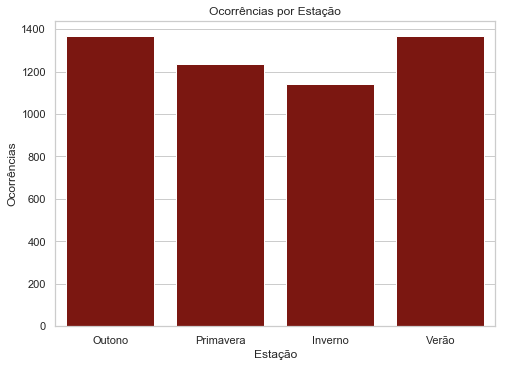

In [88]:
def estacao_ano(mes):
    if mes >= 9 and mes <= 11:
        return 'Primavera'
    elif mes >= 6 and mes <= 8:
        return 'Inverno'
    elif mes >= 3 and mes <= 5:
        return 'Outono'
    else:
        return 'Verão'

acidentes['Estação'] = acidentes['Mes'].apply(estacao_ano)

ocorrencias_por_estacao = Counter(acidentes['Estação'])
estacao = list(ocorrencias_por_estacao.keys())
acidentes_estacao = list(ocorrencias_por_estacao.values())

fig = plt.figure(figsize=(14, 10))
sub3 = fig.add_subplot(224)
sns.barplot(x=estacao, y=acidentes_estacao, color='r', ax=sub3)
texts = sub3.set(ylabel="Ocorrências", xlabel="Estação", title="Ocorrências por Estação")
plt.tight_layout(w_pad=4, h_pad=3)

# Quais fabricantes mais apresentam problemas

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

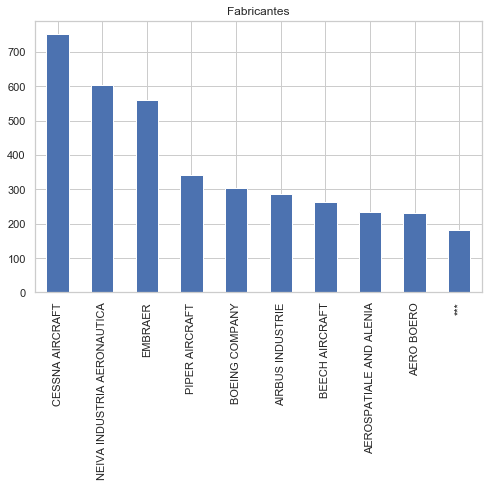

In [107]:
fabricantes = acidentes['aeronave_fabricante'].value_counts().head(10)
fabricantes.plot(kind='bar', subplots=True, label="Fabricantes" ,figsize=(8, 5))
plt.xticks(rotation=90)


# Os 10 segmentos de aviação que mais registram ocorrências

array([<matplotlib.axes._subplots.AxesSubplot object at 0x131668B0>],
      dtype=object)

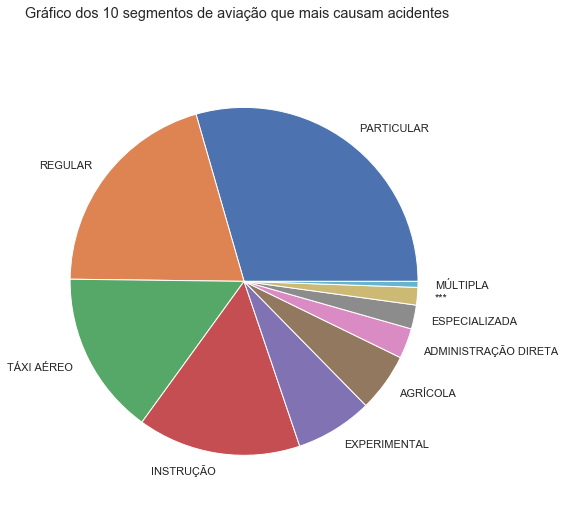

In [106]:
tipo = acidentes['aeronave_segmento_aviacao'].value_counts().head(10)
tipo.plot(kind='pie', subplots=True, label="", title="Gráfico dos 10 segmentos de aviação que mais causam acidentes" ,figsize=(8, 8))

# Quantidade de ocorrências por fase de voo.
Será mostrado apenas as 15 principais fases de voo 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108531F0>],
      dtype=object)

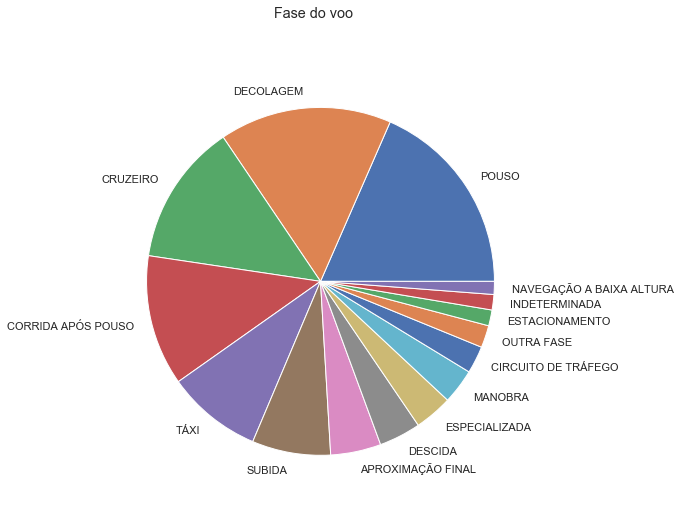

In [85]:
acidentes['aeronave_fase_voo'].value_counts().head(15).plot(kind='pie', subplots=True, label="", title="Fase do voo",figsize=(8, 8))

# Óbitos por Ano

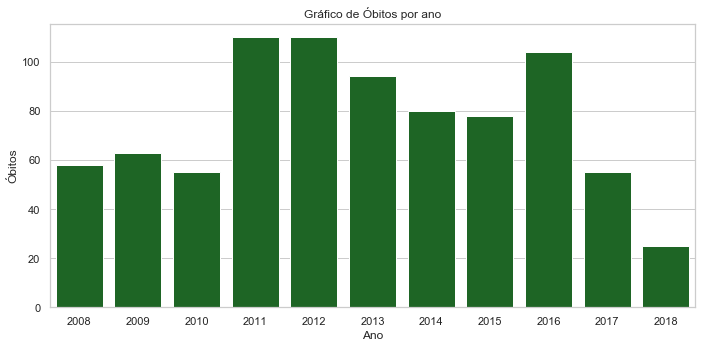

In [98]:
mortes = []
for year in anos:
    curr_data = acidentes[acidentes['Ano'] == year]
    mortes.append(curr_data['quantidade_fatalidades'].sum())
    
sns.set(style="whitegrid",font_scale=1)
sns.set_color_codes("dark")

fig = plt.figure(figsize=(10, 5))
sub3 = fig.add_subplot(111)
sns.barplot(x=anos, y=mortes, color='g', ax=sub3)
texts = sub3.set(ylabel="Óbitos", xlabel="Ano", title="Gráfico de Óbitos por ano")
plt.tight_layout(w_pad=4, h_pad=3)